#Support Vector Machines 

## 특징
- AI에서 딥러닝이 나오기 전에 가장 핵심이 되었던 기술
- Generalization ability가 좋다. 즉 적은 데이터에도 새로운 케이스에 대해서 수행을 잘 해낸다. 
- maximum margin을 가지고 class의 경계를 찾는다. 여기에서 margin은 크면 클 수록 좋은대, 새로운 데이터가 들어왔을 때 적응하는 능력인(Generalization ability)가 좋다. 즉 새로운 데이터에 대한 정답의 수용력이 커진다. 
- $||W||_2$ 에서, 가장 작은 w가 제일 큰 margin을 갖는다. 


## 종류
1. Linear SVM
2. C - SVM ; Linear SVM with Soft Margin 
3. Kernel SVM



> $WX_i + b > +1.  for y_i = + 1 $

> $WX_i + b < -1.  for y_i = - 1 $

> $y_i(WX_i + b) - 1 > 0$ : combines the two conditions 

- constrain으로 들어갔음에 유의를 해야한다(제약이 엄청 많음). 하드한 제약조건 : train data를 __모두__ 맞추는 선이어야 한다. 그래서 linear 하게 나뉘지 않는 샘플에 대해서 solution이 나오지 않는다. 즉, 직선으로 구분 가능한 sample에만 적용이 가능하다. 
- constrained optimalization : 문제 자체를 다른 관점으로 본다. 
- Lagrange mupltipliers + objective function https://ratsgo.github.io/machine%20learning/2017/05/23/SVM/ 

### Lagrange multiplier $a$에 대하여
위의 라그랑지안 함수 ​처럼 ​가 제약이 있는 최적화 문제의 해라면, ​가 함수 ​의 정류점(stationary point) 즉, 모든 편도함수(partial derivative)가 0인 지점이 되는 ​
가 존재한다는 것을 보였다.

따라서, ​에 대한 라그랑지안 ​의 편도함수를 계산할 수 있으면 이 도함수가 모두 0이 되는 지점을 찾을 수 있고, 제약이 있는 최적화 문제의 해는 이런 정류점 중에 있어야 한다.

출처: https://excelsior-cjh.tistory.com/165 


### Support vector 
- $a_i$ 값이 0이 아닌 중요한 sample들을 support vetor라고 하며 class의 경계를 만들어준다. 
- $a_i$ 값이 0인 친구들은 $X_i$ 값이 아무리 바뀌어도 영향을 주지 않는다. 오직 __boundery__에 있는 친구들만 $a_i$가 non-zero 이다. 
- 인접한 sample의 갯수는 feature demantion 하고 관계가 있다. 


# C - SVM 
# Linear SVM with 'Soft Margin'
- 강한 제약 (선형 이분 샘플)이 걸려있는 linear SVM에 대한 보완책의 방법중 하나이다. 
- SVM은 샘플이 선형으로 나뉘지 않으면 생성이 안되는 단점이 있어서 $C$를 추가 했다. 

- 크사이 라는 물고기 같은 표기가 있는데 이건 조건식에 위반(에러)을 허용해준다. 
* $W_*=argmin_W{[\frac{|W|}{2}+C(\sum_i {\xi_i})]}$  s.t.
> * $ X_iW+b \geq+1-\xi_i$ for $y_i=+1$
> * $ X_iW+b \leq-1+\xi_i$ for $y_i=-1$
> * equaivalent to $y_i(X_iW+b)-1+\xi_i\geq 0$

- 해당식에서 $C$는 다른 regression model에서 $a$처럼 제약 수준을 조절해주는 역할을 한다. 

# SVM with Kernel 
- nonlinear SVM에 생김 
- 해당 차원에서 linear하게 구분되지 않는 케이스에 대해서 높은 차원으로 보내면 구분될 확률이 __증가__
- *파생변수를 만들어서 ($ex> Hw2, x^2$) linear 방법으로 nonlinear 문제를 해결한다. 
- 참고로 차원의 수가 이보다 더 늘어남으로써 평면으로 나타낼 수 없는 decision boundary를 hyperplane(하이퍼플레인) 이라고 부릅니다.



# Nonlinear SVM
- Transform X to high dimension space through a nonlinear transform $\phi(X)$
- 근데 실제 high dinmensional 에 대해서 $\phi(X)$ 를 설정하는 것이 매우매우매우 어려움 
- 그래서 내적을 통해 $\phi(X)$ 를 따로 들고 다니는 것이 아닌 Kernel function $K(X_i,X_j)=\phi(X_i) \phi(X_j)$ 을 챙겨 내적으로 단순화해서 가지고 다닌다. 그래서 따라서 K만 계산하면 된다 
- 대신 Kernel function $K(X_i,X_j)$ 엔 2개의 transform으로 변환 할 수 있다는 제약 조건이 필요하다. 

### popular __Kernel__ for SVM

1. polynomial kernel 
- 속도가 좀 빠르다
2. Gaussian kernell 
3. RBF kernel 
- $K_{RBF}(X_i,X_j)=exp(-\gamma |X_i-X_j|^2)$
- sklearn의 defualt 이다. 성능이 좋으면 편이며, 값이 멀수록 $\gamma $ 값이 작아진다. 

In [1]:
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC # C-SVM의 사촌 방식이다.
from sklearn.svm import SVC # Kernels + SVM 

"""
SVM모델은 C 파라미터를 입력받을 수 있는데, 이는 SVM에게 얼마나 error을 허용할 것인지를 나타냅니다.
만약 C 값이 크다면 SVM은 hard한 margin을 보유하게 됩니다.
즉, dicision boundary가 error를 갖는 것을 강하게 제한함으로써 작은 margin을 갖게 됩니다.
C 값이 너무 크다면, 해당 모델은 overfitting(오버피팅)될 수 있습니다.
즉, decision boundary가 이상치에 의해서 만들어 질 수 있습니다.
"""
classifier = SVC(C = 0.01)
"""최적의 C 값은 사실 데이터에 달려 있습니다. 즉, 여러 C 값으로 모델을 평가해보면서 최적의 C 값을 찾아야 합니다."""
classifier = SVC(kernel = "rbf", gamma = 0.5, C = 2)
"""
gamma 파라미터는 C 파라미터와 비슷합니다.
 gamma 값이 크면 training 데이터에 더 많은 중요도를 부여함으로써 overfitting될 수 있고,
  반대로 gamma 값이 작으면 데이터에 중요도를 덜 부여함으로써 underfitting될 수 있습니다.
   감마가 커질 수록 global 한 영역에서 점점 밀집하여 local의 영역이 된다.
"""



'\ngamma 파라미터는 C 파라미터와 비슷합니다.\n gamma 값이 크면 training 데이터에 더 많은 중요도를 부여함으로써 overfitting될 수 있고,\n  반대로 gamma 값이 작으면 데이터에 중요도를 덜 부여함으로써 underfitting될 수 있습니다.\n   감마가 커질 수록 global 한 영역에서 점점 밀집하여 local의 영역이 된다.\n'

In [2]:
clf = SVC(gamma='scale') # 알아서 적정한 값을 설정한다. 
clf = SVC(gamma="auto") # 1/n_feature  


#cf. Unbalanced Dataset
- 보통 밸런스가 깨져있는 데이터를 가지게 된다. (ex. 정상인 vs 환자) 
1. 학습 횟수의 불균형
2. 다양성 불균형
3. 적은 샘플쪽이 손해를 보게되어 평가척도 불균형
- 의 문제가 발생한다. 

- 이 중 학습횟수 불균형은 해결이 쉽다. 예를들어 100:10 인경우 데이터를 10배를 하여 오버샘플링을 하거나 1000:100 인경우 100:100 으로 언더샘플링을 하면 된다. 
- 또한 W 가중치를 조절해서 수행할 수도 있다. 


In [3]:
! pip install mglearn

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn


     |████████████████████████████████| 542kB 2.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5ccbdb5b67a61790196977313f330546d553b7680bb3d313c828f29211f745a8
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


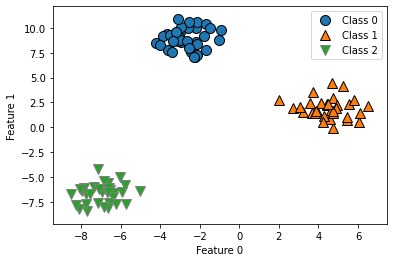

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])


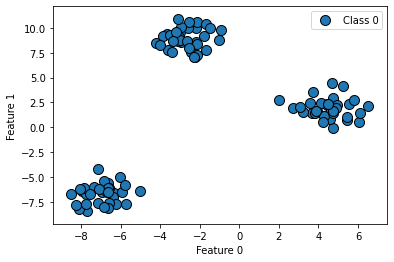

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1])

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])


In [6]:

XX, yy = make_blobs(n_features=5, centers= 5)
# centers는 군집의 갯수이다! 
print(yy)
print(XX[:10])

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler().fit(X)
X_scale = scaler.transform(X)
# 스케일을 사용하면 최솟값이 0, 최대값이 1로 다 맞추어짐 

print(X[:10])
print(X_scale[:10])


[3 0 4 4 1 4 1 1 1 2 2 3 1 3 0 0 3 4 0 2 2 3 0 3 0 2 0 3 2 4 1 0 0 3 4 2 4
 4 0 1 1 4 3 1 1 2 3 4 2 2 1 1 0 3 4 0 1 3 0 0 2 3 2 2 0 3 4 4 2 2 4 4 0 4
 1 2 1 2 3 4 3 4 3 1 1 2 4 3 4 2 1 0 3 0 1 1 0 0 2 3]
[[ -0.14922567   0.1984988   -9.4447298   -8.97475651   7.90088942]
 [ -6.59258724  -6.64660102  -8.28192547  -9.95726346  -7.86813482]
 [  5.57023294  -8.84437284   2.82711284  -5.97258935   2.44305664]
 [  6.49697582  -7.65705624   2.77623057  -7.09213664   3.3761009 ]
 [ 10.89916096  -9.74831513  -5.97497745   4.19207939   7.50159224]
 [  5.90544358  -8.71384965   3.35649496  -7.02778629   4.65978535]
 [  8.82784174  -9.02124467  -5.69014829   5.58821822   7.50784575]
 [  8.36294512  -9.81666681  -8.64266931   6.32435036   6.53332066]
 [ 10.16441967 -10.34896748  -7.25770097   3.80181978   6.5172432 ]
 [  1.51410728  -4.12499709   1.5594442    0.48798495   6.85848057]]
[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52

Coefficient shape:  (3, 2)
Intercept shape:  (3,)
[[-0.17492587  0.23141093]
 [ 0.47621339 -0.06936741]
 [-0.18914402 -0.20399799]]
[-1.07745463  0.1314028  -0.08604878]


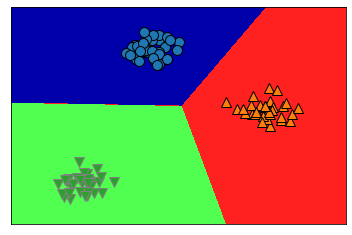

In [7]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC().fit(X,y)
print("Coefficient shape: ", lsvm.coef_.shape) # 해당위치에서 shape을 찍어보면 class의 갯수만큼 그리고 feature의 수만큼 형성되어 있다.
print("Intercept shape: ", lsvm.intercept_.shape)

# plt.scatter (X[:, 0], X[:, 1])
mglearn.discrete_scatter(X[:,0],X[:,1],y)

line = np.linspace(-15,15)

print(lsvm.coef_)
print(lsvm.intercept_)

# mglearn.plots.plot_2d_separator(lsvm, X)
mglearn.plots.plot_2d_classification(lsvm, X)
# for w, b, color in zip (lsvm.coef_, lsvm.intercept_ , mglearn.cm3.colors):
#   plt.plot(line, -(line * w[0]+b) / w[1]  , c = color)



Text(0, 0.5, 'Feature 1')

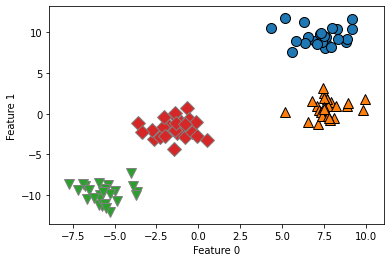

In [8]:
from sklearn.model_selection import train_test_split

# linearly non-separable task
X, y = sk.datasets.make_blobs(centers=4, random_state=8)
# y = y % 2 # 해당 코드가 y 라벨을 2개로 줄여줌 


# visualize data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


w [[-0.11546946  0.35599601]
 [ 0.50496589 -0.3313698 ]
 [-0.07755744 -0.25876628]
 [-0.24759373  0.15274177]]
b [-1.05063958 -2.10277873 -1.70812181 -0.21163145]


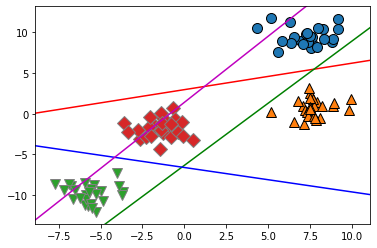

In [9]:
lsvm = LinearSVC().fit(X,y)

print("w",lsvm.coef_)
print("b",lsvm.intercept_)
line = np.linspace(-15,15)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
for w, b, c in zip(lsvm.coef_ , lsvm.intercept_, ["r","g","b","m"]):
  plt.plot(line, -(line * w[0] + b) / w[1], color=c)


Text(0, 0.5, 'Feature 1')

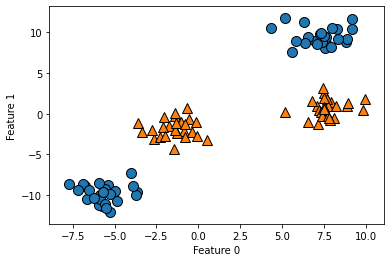

In [10]:
from sklearn.model_selection import train_test_split

# linearly non-separable task
X, y = sk.datasets.make_blobs(centers=4, random_state=8)
y = y % 2 # 해당 코드가 y 라벨을 2개로 줄여줌 


# visualize data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

w [[ 0.12785625 -0.08930462]]
b [-0.28070915]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


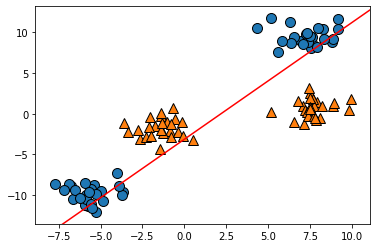

In [11]:
lsvm = LinearSVC().fit(X,y)

print("w",lsvm.coef_)
print("b",lsvm.intercept_)
line = np.linspace(-15,15)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# mglearn.plots.plot_2d_separator(lsvm, X)
for w, b, c in zip(lsvm.coef_ , lsvm.intercept_, ["r","g"]):
  plt.plot(line, -(line * w[0] + b) / w[1], color=c)


(100, 3)
[[-1.72161036e+00 -1.48033142e+00  2.19138111e+00]
 [-3.65733840e+00 -9.54823830e+00  9.11688546e+01]
 [ 7.07781630e+00  9.95087718e-01  9.90199567e-01]
 [-1.36579859e+00 -3.14862498e-01  9.91383928e-02]
 [-2.66521206e+00 -3.12591651e+00  9.77135405e+00]
 [ 7.63027116e+00  8.69797933e+00  7.56548444e+01]
 [-5.27144331e+00 -1.21188070e+01  1.46865483e+02]
 [ 7.91767139e+00  1.41547387e+00  2.00356628e+00]
 [-1.41284184e+00  1.12963480e-01  1.27607478e-02]
 [-1.01519039e+00 -1.03318203e+00  1.06746511e+00]]


Text(0.5, 0, 'feature1 ** 2')

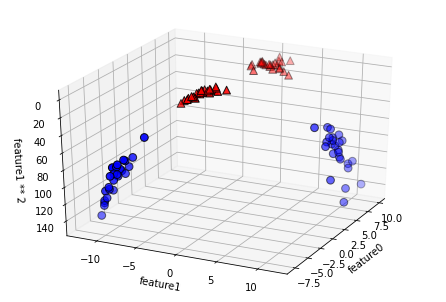

In [12]:
# transform to high-dimensional space by adding the squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])   # np.hstack() stacks arrays in sequence horizontally
print(X_new.shape)
print(X_new[:10])
# visualization
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)

# plot first all the points with y == 0, then all with y == 1
mask = y == 0
# plot class 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
# plot class 1
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

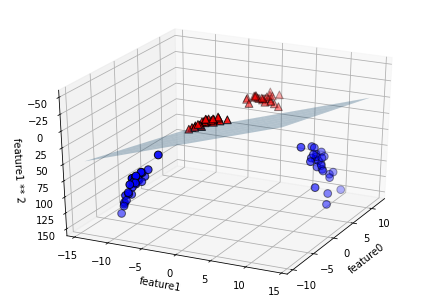

In [13]:
# Now, linear SVC works
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")

ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

support vectors:
 [[ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


Text(0, 0.5, 'Feature 1')

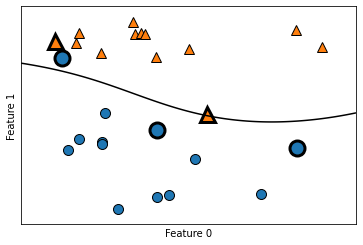

In [14]:
# kernel trick
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_
print("support vectors:\n", sv)

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0


mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

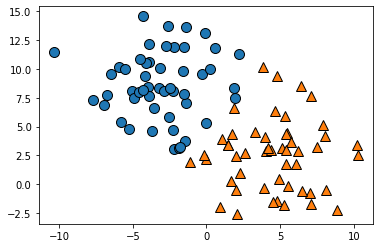

In [15]:
from sklearn.datasets import make_blobs

X, y =make_blobs(centers = 2, random_state=42, cluster_std = 3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [16]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [17]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc = svc.fit(X_train, y_train)

In [18]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

1.0
0.96


In [19]:
sv = svc.support_vectors_
print(sv)

[[ -0.04156289   5.35175518]
 [ -1.47834275   3.72516566]
 [ -2.30661301   4.74004157]
 [ -2.23391529   3.05157938]
 [  2.22844082  11.31659032]
 [ -1.88260684   3.13527576]
 [-10.36843294  11.47999364]
 [  0.23700873  10.00053946]
 [  8.84826177  -2.2323835 ]
 [ -0.18257087   2.52707126]
 [ -1.11643481   1.89362806]
 [  1.71583383   4.3344235 ]
 [  1.42720134   3.42058693]
 [  0.9290267   -1.98820016]
 [  6.40045012   8.54453656]
 [  1.4529677    3.39394698]
 [  3.84590834  10.13367718]
 [  1.06596834   3.94283051]]


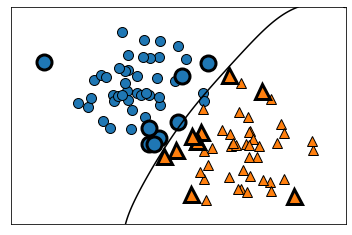

In [20]:
mglearn.plots.plot_2d_separator(svc, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv_labels = svc.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels, s=15, markeredgewidth=3)

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
"""
stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다.
stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다.
(한 쪽에 쏠려서 분배되는 것을 방지합니다)
만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
"""
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
print("Training accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print("Test accuracy: {:.2f}".format(svc.score(X_test, y_test)))

Training accuracy: 0.92
Test accuracy: 0.92


In [26]:
# min-max normaization

# compute the min and max value per feature on the training set
print(X_train.shape)
min_on_training = X_train.min(axis=0)
max_on_training = X_train.max(axis=0)
print("min =", min_on_training)
print("max =", max_on_training)

# prevent divison by zero
norm_range = max_on_training - min_on_training
norm_range[norm_range == 0] = 1

# subtract the min, and divide by range
X_train_scaled = (X_train - min_on_training) / norm_range

# afterward, min=0 and max=1 for each feature
print("Minimum for each feature:", X_train_scaled.min(axis=0))
print("Maximum for each feature:", X_train_scaled.max(axis=0))

print(X_train_scaled)

(426, 30)
(30,)
min = [6.981e+00 9.710e+00 4.379e+01 1.435e+02 6.251e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
max = [2.811e+01 3.928e+01 1.885e+02 2.499e+03 1.425e-01 3.454e-01 4.264e-01
 1.913e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.256e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.313e+01
 4.954e+01 2.293e+02 3.432e+03 2.184e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
Minimum for each feature: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[[0.61096124 0.35678052 0.5991984  ... 0.55429553 0.19396807 0.23822642]
 [0.27966302 0.11531958 0.26328519 ... 0.18439863

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
# scaler = MinMaxScaler().fit(X_test)
# scale을 test 케이스로 하지 않는 이유는 validation인데 해당 스케일로 조정할 필요가 없음 

X_test_scale = scaler.transform(X_test)
# 스케일을 사용하면 최솟값이 0, 최대값이 1로 다 맞추어짐 
print("manual",X_train_scaled)
print("package",X_train_scale)

svc = SVC()
svc.fit(X_train_scale, y_train)
print("package-scale Train Accuracy :",svc.score(X_train_scale,y_train))
print("package-scale Test Accuracy :",svc.score(X_test_scale,y_test))

svc.fit(X_train_scaled, y_train)
print("manual-scale Train Accuracy : ",svc.score(X_train_scaled,y_train))
print("manual-scale Test Accuracy :",svc.score(X_test_scale,y_test))
print("TEST : ",svc.score(X_test,y_test)) # 스케일 해놓고 다른 값 줘버리면 정확도가 많이 떨어짐 


manual [[0.61096124 0.35678052 0.5991984  ... 0.55429553 0.19396807 0.23822642]
 [0.27966302 0.11531958 0.26328519 ... 0.18439863 0.14665878 0.09254887]
 [0.48080837 0.22624281 0.498998   ... 0.87628866 0.49300217 0.3335957 ]
 ...
 [0.4012968  0.48156916 0.41469145 ... 0.74329897 0.28543268 0.33884298]
 [0.47654882 0.31687521 0.48103103 ... 0.87388316 0.3043564  0.2333071 ]
 [0.13232997 0.24619547 0.12929307 ... 0.18329897 0.19081411 0.19441165]]
package [[0.61096124 0.35678052 0.5991984  ... 0.55429553 0.19396807 0.23822642]
 [0.27966302 0.11531958 0.26328519 ... 0.18439863 0.14665878 0.09254887]
 [0.48080837 0.22624281 0.498998   ... 0.87628866 0.49300217 0.3335957 ]
 ...
 [0.4012968  0.48156916 0.41469145 ... 0.74329897 0.28543268 0.33884298]
 [0.47654882 0.31687521 0.48103103 ... 0.87388316 0.3043564  0.2333071 ]
 [0.13232997 0.24619547 0.12929307 ... 0.18329897 0.19081411 0.19441165]]
package-scale Train Accuracy : 0.9788732394366197
package-scale Test Accuracy : 0.979020979020979